In [2]:
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

pd.options.display.max_rows=10
pd.options.display.float_format="{:.1f}".format

In [3]:
training_df=pd.read_csv(filepath_or_buffer="https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv")

training_df["median_house_value"] /= 1000.0

training_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.3,34.2,15.0,5612.0,1283.0,1015.0,472.0,1.5,66.9
1,-114.5,34.4,19.0,7650.0,1901.0,1129.0,463.0,1.8,80.1
2,-114.6,33.7,17.0,720.0,174.0,333.0,117.0,1.7,85.7
3,-114.6,33.6,14.0,1501.0,337.0,515.0,226.0,3.2,73.4
4,-114.6,33.6,20.0,1454.0,326.0,624.0,262.0,1.9,65.5


In [4]:
training_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0
mean,-119.6,35.6,28.6,2643.7,539.4,1429.6,501.2,3.9,207.3
std,2.0,2.1,12.6,2179.9,421.5,1147.9,384.5,1.9,116.0
min,-124.3,32.5,1.0,2.0,1.0,3.0,1.0,0.5,15.0
25%,-121.8,33.9,18.0,1462.0,297.0,790.0,282.0,2.6,119.4
50%,-118.5,34.2,29.0,2127.0,434.0,1167.0,409.0,3.5,180.4
75%,-118.0,37.7,37.0,3151.2,648.2,1721.0,605.2,4.8,265.0
max,-114.3,42.0,52.0,37937.0,6445.0,35682.0,6082.0,15.0,500.0


In [5]:
#@title Define the functions that build and train a model
def build_model(my_learning_rate):
  """Create and compile a simple linear regression model."""
  # Most simple tf.keras models are sequential.
  model = tf.keras.models.Sequential()

  # Describe the topography of the model.
  # The topography of a simple linear regression model
  # is a single node in a single layer.
  model.add(tf.keras.layers.Dense(units=1, 
                                  input_shape=(1,)))

  # Compile the model topography into code that TensorFlow can efficiently
  # execute. Configure training to minimize the model's mean squared error. 
  model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model        


def train_model(model, df, feature, label, epochs, batch_size):
  """Train the model by feeding it data."""

  # Feed the model the feature and the label.
  # The model will train for the specified number of epochs. 
  history = model.fit(x=df[feature],
                      y=df[label],
                      batch_size=batch_size,
                      epochs=epochs)

  # Gather the trained model's weight and bias.
  trained_weight = model.get_weights()[0][0]
  trained_bias = model.get_weights()[1]

  # The list of epochs is stored separately from the rest of history.
  epochs = history.epoch
  
  # Isolate the error for each epoch.
  hist = pd.DataFrame(history.history)

  # To track the progression of training, we're going to take a snapshot
  # of the model's root mean squared error at each epoch. 
  rmse = hist["root_mean_squared_error"]

  return trained_weight, trained_bias, epochs, rmse

print("Defined the build_model and train_model functions.")

Defined the build_model and train_model functions.


In [6]:
#@title Define the plotting functions
def plot_the_model(trained_weight, trained_bias, feature, label):
  """Plot the trained model against 200 random training examples."""

  # Label the axes.
  plt.xlabel(feature)
  plt.ylabel(label)

  # Create a scatter plot from 200 random points of the dataset.
  random_examples = training_df.sample(n=200)
  plt.scatter(random_examples[feature], random_examples[label])

  # Create a red line representing the model. The red line starts
  # at coordinates (x0, y0) and ends at coordinates (x1, y1).
  x0 = 0
  y0 = trained_bias
  x1 = random_examples[feature].max()
  y1 = trained_bias + (trained_weight * x1)
  plt.plot([x0, x1], [y0, y1], c='r')

  # Render the scatter plot and the red line.
  plt.show()


def plot_the_loss_curve(epochs, rmse):
  """Plot a curve of loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.97, rmse.max()])
  plt.show()  

print("Defined the plot_the_model and plot_the_loss_curve functions.")

Defined the plot_the_model and plot_the_loss_curve functions.


C:\Users\Sumit Kumar.DESKTOP-FNL8J4G\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
567/567 ━━━━━━━━━━━━━━━━━━━━ 1s 767us/step - loss: 89899.0000 - root_mean_squared_error: 275.4844
Epoch 2/30
567/567 ━━━━━━━━━━━━━━━━━━━━ 0s 707us/step - loss: 27293.8301 - root_mean_squared_error: 165.1960
Epoch 3/30
567/567 ━━━━━━━━━━━━━━━━━━━━ 1s 827us/step - loss: 27379.7617 - root_mean_squared_error: 165.4561
Epoch 4/30
567/567 ━━━━━━━━━━━━━━━━━━━━ 1s 825us/step - loss: 26087.3750 - root_mean_squared_error: 161.5078
Epoch 5/30
567/567 ━━━━━━━━━━━━━━━━━━━━ 0s 737us/step - loss: 25647.4707 - root_mean_squared_error: 160.1161
Epoch 6/30
567/567 ━━━━━━━━━━━━━━━━━━━━ 0s 737us/step - loss: 24583.4922 - root_mean_squared_error: 156.7634
Epoch 7/30
567/567 ━━━━━━━━━━━━━━━━━━━━ 0s 767us/step - loss: 24569.7207 - root_mean_squared_error: 156.7239
Epoch 8/30
567/567 ━━━━━━━━━━━━━━━━━━━━ 0s 737us/step - loss: 23965.9648 - root_mean_squared_error: 154.7901
Epoch 9/30
567/567 ━━━━━━━━━━━━━━━━━━━━ 0s 766us/step - loss: 22989.6914 - root_mean_squared_error: 151.6034
Epoch 10/30
567/567

C:\Users\Sumit Kumar.DESKTOP-FNL8J4G\AppData\Local\Temp\ipykernel_17768\2728482424.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("\n The learned weight %.4f"% weight)
C:\Users\Sumit Kumar.DESKTOP-FNL8J4G\AppData\Local\Temp\ipykernel_17768\2728482424.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("\n The learned bisa %.4f"%bias)


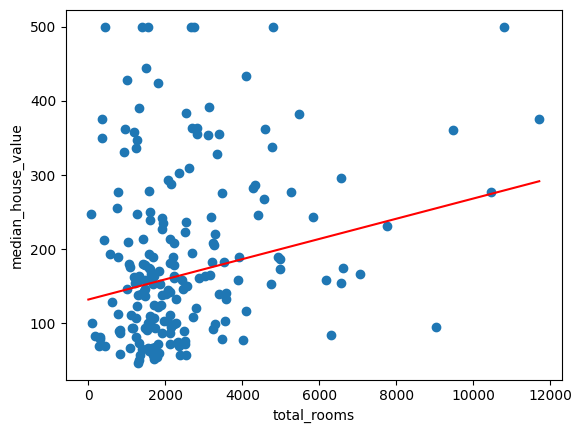

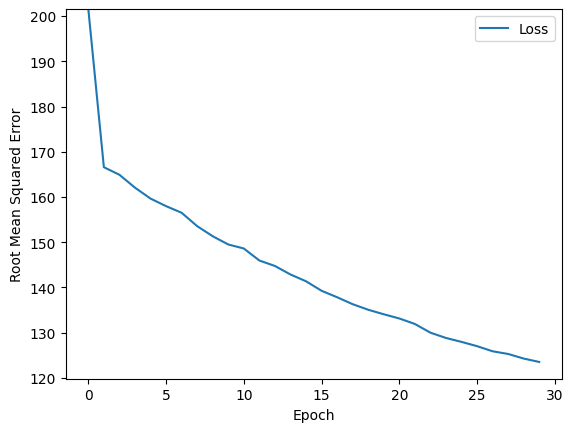

In [7]:
learning_rate=0.01
epochs=30
batch_size=30

my_feature="total_rooms"
my_label="median_house_value"

my_model=None

my_model=build_model(learning_rate)
weight,bias,epochs,rmse=train_model(my_model,training_df,my_feature,my_label,epochs,batch_size)

print("\n The learned weight %.4f"% weight)
print("\n The learned bisa %.4f"%bias)

plot_the_model(weight,bias,my_feature,my_label)
plot_the_loss_curve(epochs,rmse)


In [8]:
def predict_house_values(n,feature,label):
    batch=training_df[feature][10000:10000 + n]
    predicted_values=my_model.predict_on_batch(x=batch)
    print("feature   label          predicted")
    print("  value   value          value")
    print("          in thousand$   in thousand$")
    for i in range(n):
        print("%5.0f %6.0f %15.0f"%(training_df[feature][10000+i],
                                    training_df[label][10000+i],
                                    predicted_values[i][0]))
    

In [9]:
predict_house_values(10,my_feature,my_label)

feature   label          predicted
  value   value          value
          in thousand$   in thousand$
 1960     53             159
 3400     92             179
 3677     69             182
 2202     62             162
 2403     80             165
 5652    295             209
 3318    500             177
 2552    342             167
 1364    118             151
 3468    128             179


Epoch 1/18


C:\Users\Sumit Kumar.DESKTOP-FNL8J4G\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5667/5667 ━━━━━━━━━━━━━━━━━━━━ 5s 746us/step - loss: 36731.8281 - root_mean_squared_error: 190.3629
Epoch 2/18
5667/5667 ━━━━━━━━━━━━━━━━━━━━ 5s 817us/step - loss: 20145.0352 - root_mean_squared_error: 141.9002
Epoch 3/18
5667/5667 ━━━━━━━━━━━━━━━━━━━━ 4s 750us/step - loss: 17925.9727 - root_mean_squared_error: 133.8643
Epoch 4/18
5667/5667 ━━━━━━━━━━━━━━━━━━━━ 5s 859us/step - loss: 17929.7578 - root_mean_squared_error: 133.8867
Epoch 5/18
5667/5667 ━━━━━━━━━━━━━━━━━━━━ 4s 720us/step - loss: 18372.6270 - root_mean_squared_error: 135.5086
Epoch 6/18
5667/5667 ━━━━━━━━━━━━━━━━━━━━ 4s 719us/step - loss: 17778.5918 - root_mean_squared_error: 133.3246
Epoch 7/18
5667/5667 ━━━━━━━━━━━━━━━━━━━━ 4s 757us/step - loss: 18389.4141 - root_mean_squared_error: 135.5848
Epoch 8/18
5667/5667 ━━━━━━━━━━━━━━━━━━━━ 5s 694us/step - loss: 18086.6680 - root_mean_squared_error: 134.4373
Epoch 9/18
5667/5667 ━━━━━━━━━━━━━━━━━━━━ 5s 839us/step - loss: 18116.6230 - root_mean_squared_error: 134.5692
Epoch 10/18


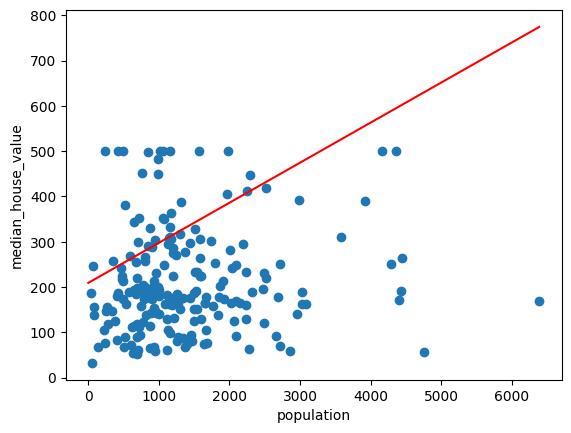

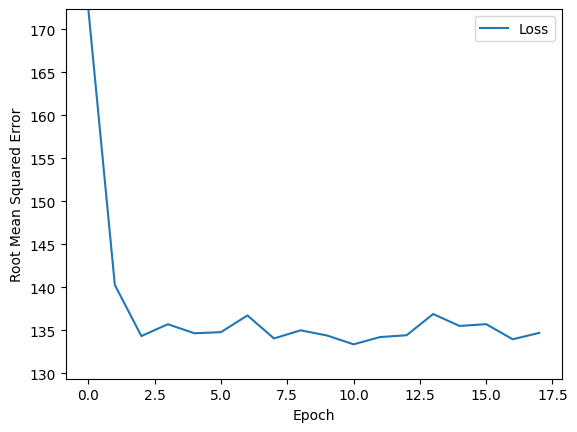

feature   label          predicted
  value   value          value
          in thousand$   in thousand$
 1286     53             323
 1867     92             374
 2191     69             403
 1052     62             302
 1647     80             355
 2312    295             414
 1604    500             351
 1066    342             304
  338    118             239
 1604    128             351


In [10]:
my_feature="population"

learning_rate=0.05
epochs=18
batch_size=3

my_model=build_model(learning_rate)
weight,bias,epochs,rmse=train_model(my_model,training_df,my_feature,my_label,epochs,batch_size)
plot_the_model(weight,bias,my_feature,my_label)
plot_the_loss_curve(epochs,rmse)
predict_house_values(10,my_feature,my_label)

Epoch 1/24


C:\Users\Sumit Kumar.DESKTOP-FNL8J4G\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


567/567 ━━━━━━━━━━━━━━━━━━━━ 1s 858us/step - loss: 373980.7188 - root_mean_squared_error: 527.1464
Epoch 2/24
567/567 ━━━━━━━━━━━━━━━━━━━━ 0s 732us/step - loss: 31248.0996 - root_mean_squared_error: 176.7324
Epoch 3/24
567/567 ━━━━━━━━━━━━━━━━━━━━ 0s 760us/step - loss: 30898.0156 - root_mean_squared_error: 175.1772
Epoch 4/24
567/567 ━━━━━━━━━━━━━━━━━━━━ 0s 736us/step - loss: 24194.1367 - root_mean_squared_error: 155.5306
Epoch 5/24
567/567 ━━━━━━━━━━━━━━━━━━━━ 0s 737us/step - loss: 21412.5469 - root_mean_squared_error: 146.2945
Epoch 6/24
567/567 ━━━━━━━━━━━━━━━━━━━━ 0s 744us/step - loss: 20373.6484 - root_mean_squared_error: 142.6962
Epoch 7/24
567/567 ━━━━━━━━━━━━━━━━━━━━ 0s 738us/step - loss: 19722.7168 - root_mean_squared_error: 140.3281
Epoch 8/24
567/567 ━━━━━━━━━━━━━━━━━━━━ 0s 784us/step - loss: 18564.2891 - root_mean_squared_error: 136.2018
Epoch 9/24
567/567 ━━━━━━━━━━━━━━━━━━━━ 0s 799us/step - loss: 17783.8672 - root_mean_squared_error: 133.3505
Epoch 10/24
567/567 ━━━━━━━━━

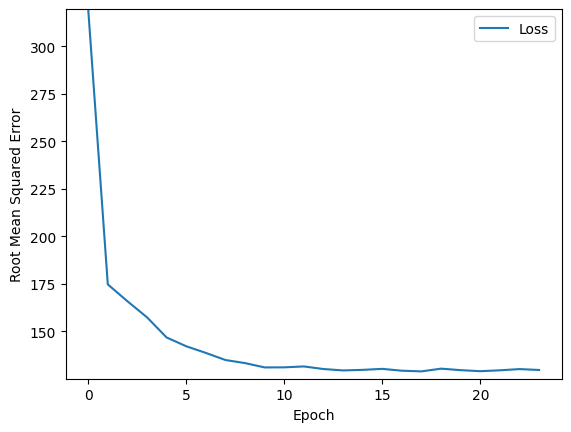

feature   label          predicted
  value   value          value
          in thousand$   in thousand$
 1286     53             248
 1867     92             265
 2191     69             274
 1052     62             242
 1647     80             259
 2312    295             277
 1604    500             257
 1066    342             242
  338    118             222
 1604    128             257
 1200    187             246
  292     80             221
 2014    112             269
 1817     95             263
 1328     69             250


In [12]:
training_df["room_per_person"]=training_df["total_rooms"] / training_df["population"]

learning_rate=0.06
epochs=24
batch_size=30

my_model=build_model(learning_rate)
weight,bias,epochs,rmse=train_model(my_model,training_df,my_feature,my_label,epochs,batch_size)

plot_the_loss_curve(epochs,rmse)
predict_house_values(15,my_feature,my_label)

Find feature(s) whose raw values correlate with the label
So far, we've relied on trial-and-error to identify possible features for the model. Let's rely on statistics instead.

A correlation matrix indicates how each attribute's raw values relate to the other attributes' raw values. Correlation values have the following meanings:

1.0: perfect positive correlation; that is, when one attribute rises, the other attribute rises.
-1.0: perfect negative correlation; that is, when one attribute rises, the other attribute falls.
0.0: no correlation; the two columns are not linearly related.
In general, the higher the absolute value of a correlation value, the greater its predictive power. For example, a correlation value of -0.8 implies far more predictive power than a correlation of -0.2.

The following code cell generates the correlation matrix for attributes of the California Housing Dataset:

In [13]:
training_df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,room_per_person
longitude,1.0,-0.9,-0.1,0.0,0.1,0.1,0.1,-0.0,-0.0,-0.1
latitude,-0.9,1.0,0.0,-0.0,-0.1,-0.1,-0.1,-0.1,-0.1,0.1
housing_median_age,-0.1,0.0,1.0,-0.4,-0.3,-0.3,-0.3,-0.1,0.1,-0.1
total_rooms,0.0,-0.0,-0.4,1.0,0.9,0.9,0.9,0.2,0.1,0.1
total_bedrooms,0.1,-0.1,-0.3,0.9,1.0,0.9,1.0,-0.0,0.0,0.0
population,0.1,-0.1,-0.3,0.9,0.9,1.0,0.9,-0.0,-0.0,-0.1
households,0.1,-0.1,-0.3,0.9,1.0,0.9,1.0,0.0,0.1,-0.0
median_income,-0.0,-0.1,-0.1,0.2,-0.0,-0.0,0.0,1.0,0.7,0.2
median_house_value,-0.0,-0.1,0.1,0.1,0.0,-0.0,0.1,0.7,1.0,0.2
room_per_person,-0.1,0.1,-0.1,0.1,0.0,-0.1,-0.0,0.2,0.2,1.0


Epoch 1/24


C:\Users\Sumit Kumar.DESKTOP-FNL8J4G\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1700/1700 ━━━━━━━━━━━━━━━━━━━━ 2s 720us/step - loss: 68182.1406 - root_mean_squared_error: 240.2279
Epoch 2/24
1700/1700 ━━━━━━━━━━━━━━━━━━━━ 1s 719us/step - loss: 26816.4688 - root_mean_squared_error: 163.6615
Epoch 3/24
1700/1700 ━━━━━━━━━━━━━━━━━━━━ 1s 717us/step - loss: 22942.2656 - root_mean_squared_error: 151.2476
Epoch 4/24
1700/1700 ━━━━━━━━━━━━━━━━━━━━ 1s 698us/step - loss: 18209.0078 - root_mean_squared_error: 134.9045
Epoch 5/24
1700/1700 ━━━━━━━━━━━━━━━━━━━━ 1s 718us/step - loss: 18314.2207 - root_mean_squared_error: 135.2367
Epoch 6/24
1700/1700 ━━━━━━━━━━━━━━━━━━━━ 1s 839us/step - loss: 17826.4238 - root_mean_squared_error: 133.4874
Epoch 7/24
1700/1700 ━━━━━━━━━━━━━━━━━━━━ 1s 675us/step - loss: 17424.3672 - root_mean_squared_error: 131.9887
Epoch 8/24
1700/1700 ━━━━━━━━━━━━━━━━━━━━ 1s 695us/step - loss: 18095.1504 - root_mean_squared_error: 134.2313
Epoch 9/24
1700/1700 ━━━━━━━━━━━━━━━━━━━━ 1s 732us/step - loss: 17934.7891 - root_mean_squared_error: 133.9000
Epoch 10/24


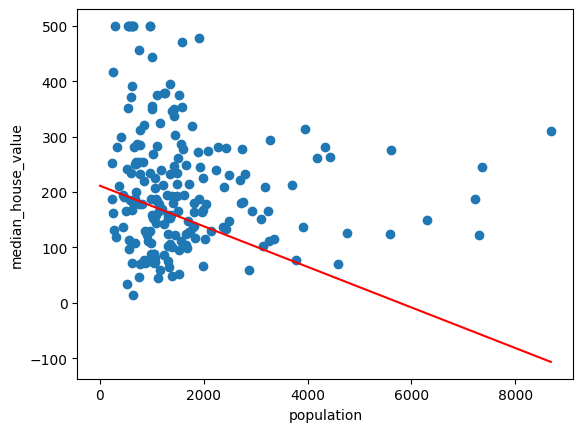

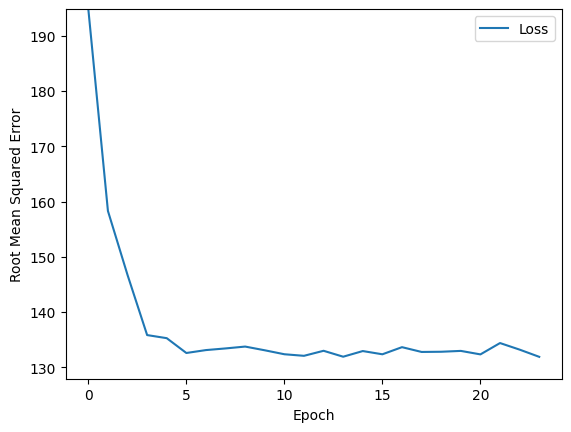

feature   label          predicted
  value   value          value
          in thousand$   in thousand$
 1286     53             164
 1867     92             143
 2191     69             131
 1052     62             173
 1647     80             151
 2312    295             127
 1604    500             153
 1066    342             172
  338    118             199
 1604    128             153


In [15]:
learning_rate=0.06
epochs=24
batch_size=10

my_model=build_model(learning_rate)
weight,bias,epochs,rmse=train_model(my_model,training_df,my_feature,my_label,epochs,batch_size)

plot_the_model(weight,bias,my_feature,my_label)
plot_the_loss_curve(epochs,rmse)
predict_house_values(10,my_feature,my_label)